<img src="media/Cryo+ESA_logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# The mass balance of the ice sheets
*Author Roelof Rietbroek, University of Twente, March 2021*

![Schematic representation of a marine grounded ice sheet with ice shelf](media/icesheetBamber2019.jpg)
*A schematic representation of a marine grounded icesheet with an attached ice shelf, as commonly found in Antarctica, source [Bamber et al. 2019](https://iopscience.iop.org/article/10.1088/1748-9326/aac2f0)*

In contrast to the sea ice which develops on the ocean itself, Antarctica and Greenland are home to the world's 2 largest ice sheets. These icesheets are resting on the bedrock (grounded icesheets) and are a dynamic entity in the sense that they are continuously gaining and losing mass. In particular in Antarctica, those grounded icesheets are "marine grounded", meaning that the outlet of the icesheet is partly submerged in the ocean (see figure).

Precipitation in the form of snow gets deposited on the top of the icesheet, and then, driven by gravity, are slowly moving to the lower lying areas. The fastest flows are found in outlet-glaciers, and can reach speeds up to several meters per day. The ice will ultimately disintegrate and end up in glacial lakes, on mountain hangs or in the ocean, through a process called **calving**.

![Ice velocity field](media/Greenlandiceflow.png)

*Greenland Ice Sheet Velocity 2019/20 from SENTINEL-1 winter campaign from 2019/12/14 to 2020/01/31 [source](http://products.esa-icesheets-cci.org/products/details/greenland_iv_250m_s1_20191214_20200131_v1_3.zip/)*

At the same time, melting processes, at the surface or bottom of the glaciers, denoted by surface and basal melting respectively, cause the icesheet to lose mass in liquid form. On more regional scales, sublimation, the direct phase change from ice to water vapour does play a role in regions with katabatic winds (gravity driven offshore winds flowing down from the icesheets). For example, in a warming climate [it is expected that part of the expected precipitation increase may be compensated by an increase in sublimation](https://www.pnas.org/content/114/41/10858.short).

An ice sheet in balance would gain as much mass as it loses, but currently the icesheets are in imbalance where they lose more mass than they gain. Most of the mass loss in Greenland comes from (surface) melting processes, whereas in Antarctica an increase in the calving process is currently driving the imbalance. It should be noted that the presence of a thick iceshelf at the marine part of the glaciers also provides a "butressing" effect. It essentially pushes back against the glacier and thus limiting this calving process. This also means that a decrease of those iceshelfs may result in an accelerated loss. 

![The surface of the Franz Joseph glacier in New Zealand darkened because of the 2019 Australian wildfires](media/Chopper_NZ.jpg)
*The surface of the Franz Joseph glacier in New Zealand darkened because of the 2019 Australian wildfires. Credit Elizabeth Carson via Twitter*

An imbalance of the ice sheets has implications for the **water cycle** through sea level rise and also interference with the ocean circulation through additional fresher meltwater input. Furthermore, surface processes may alter the albedo of the icesheets and thus have leverage on **the energy cycle** of the ice sheets, by changing the absorbed solar radation into the icesheets. An example of a negative feedback process would be the increase in snowfall from a warmer atmosphere and ocean, giveing rise to a whiter more reflective surface. Whereas a positive warming feedback is induced by algea growth and more meltponds on the surface.

Ice sheets and iceshelfs are part of the list of [Essential climate variables](https://www.ncdc.noaa.gov/gosic/gcos-essential-climate-variable-ecv-data-access-matrix/gcos-land-ecv-ice-sheets), because they play such an important role for the Earth's climate. To know the state of the icesheets it's important to observe its surface elevation, thickness, geometry (location of the grounding lines), the velocity , and mass change.

# Greenland mass change exercise

The Gravity Recovery and Climate Experiment (GRACE, and it's follow-on GRACE-FO), [have the unique ability to 'weigh' the ice sheets from space](https://earth.esa.int/eogateway/missions/grace). The satellite mission uses the principle that satellite orbits are affected by gravitational changes of the Earth. In reversal, a very accurate tracking of the satellite orbits over time allows the determination of mass changes on the Earth.

In this exercise we download and visualize a GRACE CCI product of ice mass change using cate software. After the exercise you'll have an idea of the current imbalance of the Greenland icesheet and see where the icesheet is losing mass.


In [1]:
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_REGISTRY
from cate.util.monitor import ConsoleMonitor

#temporary hack to work around (https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop)
import nest_asyncio
nest_asyncio.apply()
# and temporary hack

monitor=ConsoleMonitor()

In [2]:
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp_os')

In [ ]:
# lets query the dataserver
icesheetqry=data_store.query(query_expr="GRACE")
for it in icesheetqry:
    print(it.id)

In [ ]:
# open the dataset
greenqry=data_store.query("esacci.ICESHEETS.yr.Unspecified.GMB.GRACE-instrument.GRACE.UNSPECIFIED.1-4.greenland_gmb_mass_trends")[0]

greenTrnd=greenqry.open_dataset()

esacci.ICESHEETS.yr.Unspecified.GMB.GRACE-instrument.GRACE.UNSPECIFIED.1-4.greenland_gmb_mass_trends# now load the variable

Text(0.5, 1.0, 'mm/yr (equivalent water) 2004 - 2008')

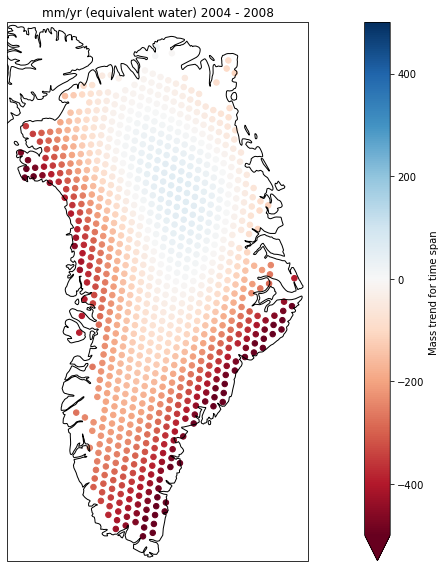

In [99]:
from xarray.plot import scatter
import cartopy.crs as ccrs
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np

%matplotlib inline
itime=1
yrstart=np.datetime_as_string(greenTrnd.start_time[itime],unit="Y")
yrend=np.datetime_as_string(greenTrnd.end_time[itime],unit="Y")
mpl.figure(figsize=(16,8))
crs=ccrs.NorthPolarStereo(-45)
xy=crs.transform_points(ccrs.PlateCarree(),greenTrnd.longitude.values,greenTrnd.latitude.values)
ax = mpl.subplot(projection=crs)
ax.coastlines()
greenTrnd.isel(time=itime).plot.scatter(x="longitude",y="latitude",hue="GMB_trend",cmap="RdBu",transform=ccrs.PlateCarree(),ax=ax,vmin=-500,vmax=500,s=30)
ax.set_title("mm/yr (equivalent water) %s - %s"%(yrstart,yrend))

## Questions
* Try to select different trend periods. In which regions do you see changes?
* The spatial resolution of mass changes from GRACE and GRACE-FO are much coarser than what can be obtained from for example ice altimetry from e.g. Cryosat2. To what extent are these two datasets complementary? 
